## Author : RUCHIT JERAMBHAI VITHANI
## ID : 201701070

### Importing libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import datasets

In [25]:
ex2data = pd.read_excel('ex2data1-logistic.xls')
kmeans_data = pd.read_excel('kmeans_data.xlsx')

# Explore the dataset

Dataset 1 contains a labeled dataset of 2-D points. Each data point has label either 0 or 1. There are total 100 points in this dataset

In [26]:
ex2data

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


Dataset 2 contains an unlabeled points in 2 dimensions. There are total 300 points in this dataset. We can clearly observe the three clusters of data points in this dataset

In [27]:
kmeans_data

,x1,x2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


There are total 60 points with label 1 and 40 points with label 0 in dataset 1.

In [28]:
ex2data['y'].value_counts()

1    60
0    40
Name: y, dtype: int64

### Visualise the dataset-1 with labels

As can be seen in the plot of dataset 1, we can not clearly identify the clusters in the dataset. We will use elbow method to identify the optimal number of clusters in this dataset

In [29]:
ex2data0 = ex2data[ex2data["y"]==0]
ex2data1 = ex2data[ex2data["y"]==1]

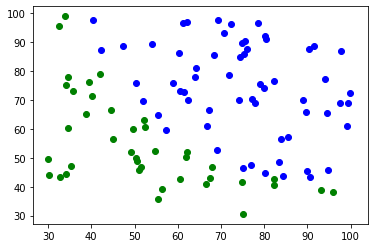

In [30]:
plt.scatter(ex2data0["x1"], ex2data0["x2"], color='g')
plt.scatter(ex2data1["x1"], ex2data1["x2"], color='b')

### Visualise the unlabeled dataset-2

We can clearly see that there are three clusters in this dataset. The elbow diagram of this dataset will also show that the ideal number of clusters for this dataset is 3. 

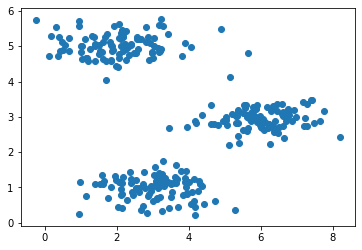

In [33]:
plt.scatter(kmeans_data["x1"], kmeans_data["x2"])

Converting the dataset into numpy arrays

In [66]:
ds1 = np.array([ex2data["x1"], ex2data["x2"]]).transpose()
ds2 = np.array([kmeans_data["x1"], kmeans_data["x2"]]).transpose()

The details of the functions defined in the following cell are : 

(1) `distance(x, y)` : Returns the eucledian distance between the points `x` and `y`. <br>
(2) `variability(c)` : Returns the variability of points present in cluster `c`. <br>
(3) `dissimilarity(C)` : Returns the dissimilarity of set of clusters `C`. (Dissimilarity is nothing but the sum of variabilities of all clusters). <br>
(4) `kMeans(k, ds)` : Clusters the dataset `ds`into `k` clusters. Returns the dataset back in the form of clusters.

In [215]:
def distance(x, y):
    return np.linalg.norm(x-y)

def variability(c):
    mean = c.mean(axis=0)
    variability=0
    for i in range(len(c)):
        variability += distance(mean, c[i])
    return variability

def dissimilarity(C):
    diss = 0
    for cluster in C:
        diss += variability(C[cluster])
    return diss

def kMeans(k, ds):
    n = len(ds)
    m1 = ds.max(axis=0)
    m2 = ds.min(axis=0)
    
    # set of clusters
    centroids = { i+1 : np.random.uniform(m2, m1) for i in range(k)}
    centroids_changed = True
    while centroids_changed:
        C = {}
        for point in ds:
            mn = 1e6
            for center in centroids:
                dis = distance(centroids[center], point)
                if(dis < mn):
                    mn = dis
                    mn_centroid = center
            assert(mn_centroid)
            if mn_centroid in C:
                C[mn_centroid] = np.vstack((C[mn_centroid], point))
            else:
                C[mn_centroid] = point
        flag = 0
        for i in range(1,k+1):
            if i not in C:
                return kMeans(k, ds)
            new_centroid = np.mean(C[i], axis=0)
            if((new_centroid != centroids[i]).any()):
                flag=1
            centroids[i] = new_centroid
        centroids_changed = flag
    return C

Since the initial clusters are selected at random, and the clustering algorithm is not deterministic, we perform several trials and select the best set of clusters from these trials. In the following part, we select `K` (the number of clusters) in the range of 1 to 10, and obtain the optimal clusters for each of these values of the k. Then we calculate the dissimilarity associated with each value of `k`, and its corresponding set of clusters. 

Then we plot these dissimilarity values against k and obtain the elbow diagram. From the elbow diagram, we can select the optimal number of clusters. The elbow diagram looks like a hand, the optimal number of clusters is the number corresponding th elbow part of this hand.

**NOTE : Since the dataset-1 is not properly clustered, we can not observe the clear elbow in dataset-1 as in dataset-2 (which is clustered in to 3 clusters)**

In [242]:
trials = 10
k_range = 10

distortions = []
for k in range(1, k_range+1):
    best = kMeans(k, ds1)
    dis = dissimilarity(best)
    for i in range(trials):
        exp = kMeans(k, ds1)
        dis_exp = dissimilarity(exp)
        
        if(dis_exp < dis):
            best = exp
            dis = dis_exp
    distortions.append(dis)

# plt.plot(range(1, 10), distortions, 'bx-')
    

As we can see, the decrease in the dissimilarity value is relatively low after `K=5`. Hence we select the number of clusters as 5. 

Text(0, 0.5, 'Dissimilarity in clusters')

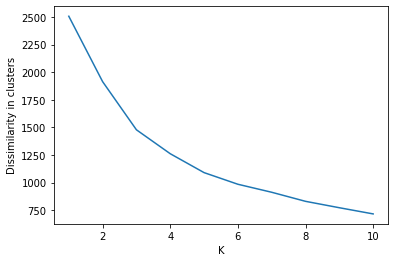

In [243]:
plt.plot(range(1,11), distortions)
plt.xlabel("K")
plt.ylabel("Dissimilarity in clusters")

## Plot for clustering with `K=5` for dataset-1. 

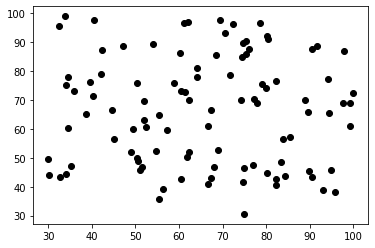

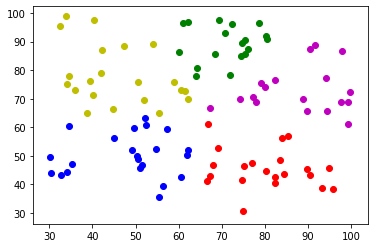

In [260]:
K = 5
clusters = kMeans(K, ds1)

plt.figure(1)
plt.scatter(ds1.transpose()[0], ds1.transpose()[1], color='k')

plt.figure(2)
color_map = {1: 'r', 2:'g', 3:'b', 4:'m', 5:'y'}
for cluster in clusters:
    c = clusters[cluster].transpose()
    plt.scatter(c[0], c[1], color=color_map[cluster])
    


As we can see in the plot below, the elbow part of the hand clearly corresponds the `K=3`. Which is also apparent from the visualisation of dataset-2. (since it is clearly clustered in to 3 clusters).

In [254]:
trials = 10
k_range = 10

distortions = []
for k in range(1, k_range+1):
    best = kMeans(k, ds2)
    dis = dissimilarity(best)
    for i in range(trials):
        exp = kMeans(k, ds2)
        dis_exp = dissimilarity(exp)
        
        if(dis_exp < dis):
            best = exp
            dis = dis_exp
    distortions.append(dis)

Text(0, 0.5, 'Dissimilarity in clusters')

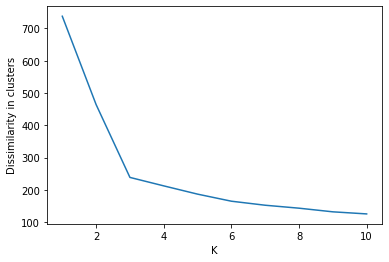

In [255]:
plt.plot(range(1,11), distortions)
plt.xlabel("K")
plt.ylabel("Dissimilarity in clusters")

## Plot for clustering with `K=3` for dataset-2.

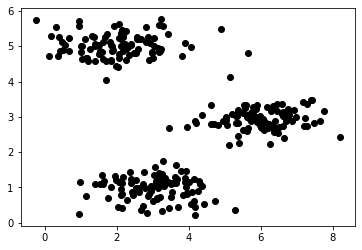

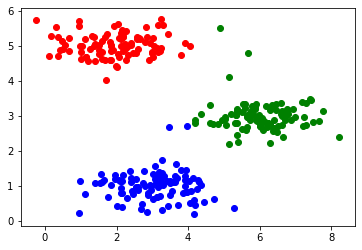

In [258]:
K = 3
clusters = kMeans(K, ds2)

plt.figure(1)
plt.scatter(ds2.transpose()[0], ds2.transpose()[1], color='k')

plt.figure(2)
color_map = {1: 'r', 2:'g', 3:'b', 4:'m', 5:'y'}
for cluster in clusters:
    c = clusters[cluster].transpose()
    plt.scatter(c[0], c[1], color=color_map[cluster])